1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

In [2]:
#Generate a dataset simulating 3 features
feature1 = np.random.normal(loc=0, scale=1, size=(1000))
feature2 = np.random.normal(loc=0, scale=3, size=(1000))
feature3 = 2 * feature1 + feature2
data = np.array([feature1, feature2, feature3])

print(data)

[[ 0.53686319 -0.27778208 -0.5207532  ... -1.57042775 -1.34946823
  -0.77220097]
 [ 3.91074444 -2.84147479 -3.25945984 ... -0.04267145 -1.79012122
  -2.15897873]
 [ 4.98447082 -3.39703896 -4.30096625 ... -3.18352694 -4.48905769
  -3.70338068]]


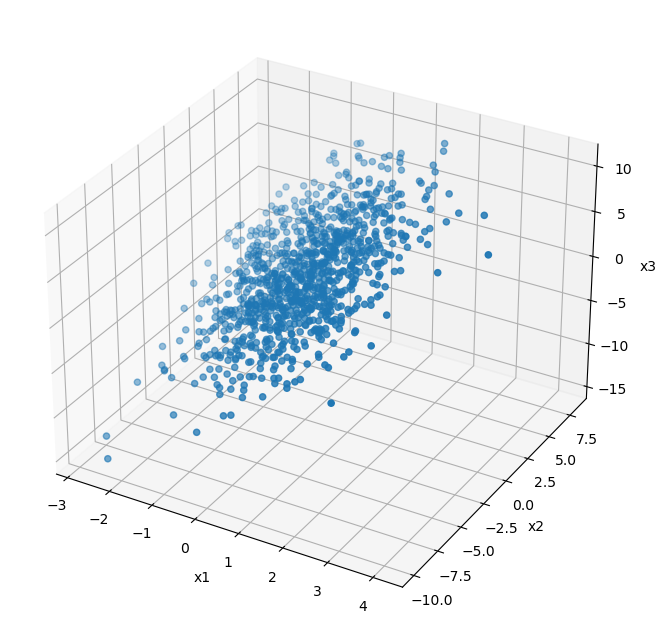

In [3]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

x = data[0]
y = data[1]
z = data[2]

ax.scatter(x, y, z)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")

plt.show()

In [4]:
#Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov = np.cov(data, bias=False)
l, V = la.eig(cov)
l = np.real_if_close(l)

Eigenvalue: 20.526594463796616 ,	eigenvector: [-0.08248959 -0.61736268 -0.78234186]
Eigenvalue: 5.842564601897207e-16 ,	eigenvector: [ 0.81649658  0.40824829 -0.40824829]
Eigenvalue: 2.9581903024928886 ,	eigenvector: [-0.57142699  0.67245569 -0.47039829]


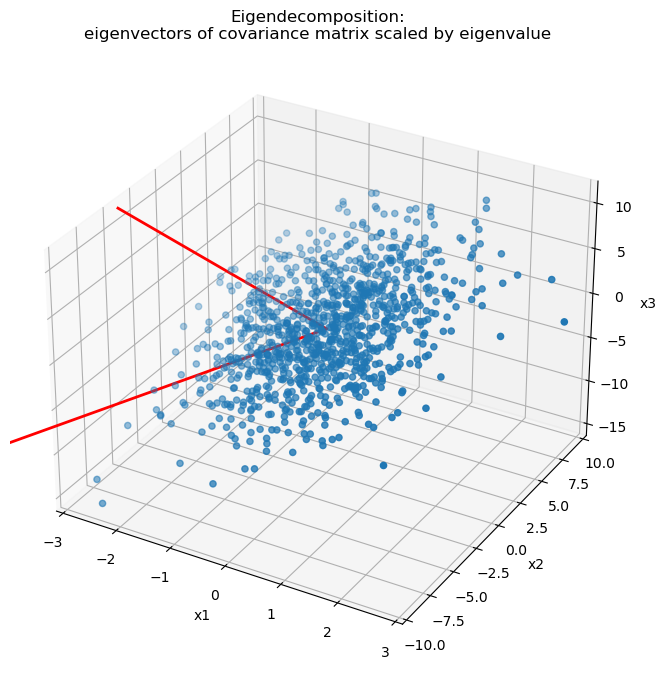

In [5]:
# Graphically represent the eigenvectors rescaled by the eigenvalues
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')
x = data[0]
y = data[1]
z = data[2]

ax.scatter(x, y, z)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")

scale_factor = 3
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
plt.axis([-3, 3, -10, 10])
plt.title('Eigendecomposition:\neigenvectors of covariance matrix scaled by eigenvalue')
plt.show()

In [6]:
#Find the eigenvectors and eigenvalues using the SVD.
U, S, Vt = np.linalg.svd(data)
n = 1000
l_svd = S**2/(n-1)
V_svd = U

Eigenvalue: 20.52743008026717 ,	eigenvector: [-0.08251647  0.5714231  -0.81649658]
Eigenvalue: 2.9590079845325996 ,	eigenvector: [-0.61733104 -0.67248473 -0.40824829]
Eigenvalue: 3.886975435536884e-31 ,	eigenvector: [-0.78236399  0.47036148  0.40824829]


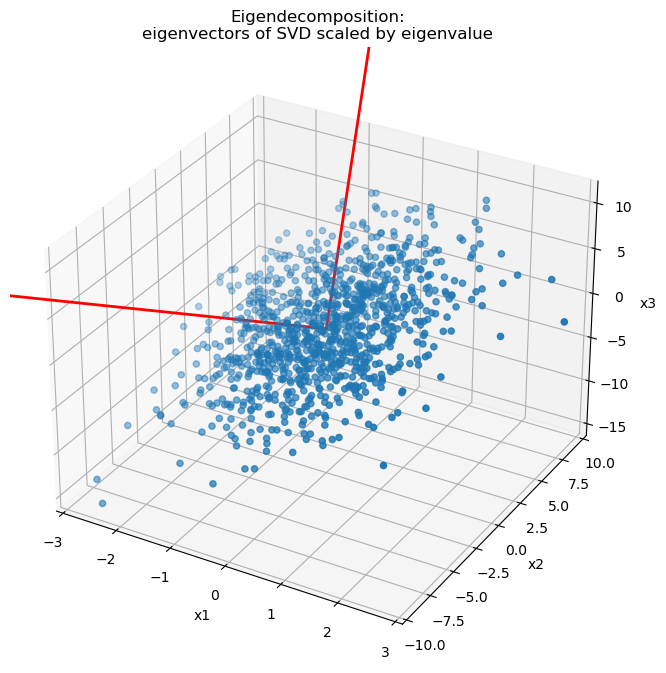

In [7]:
fig = plt.figure(figsize=(8, 8))
# the original data distribution
ax = fig.add_subplot(111, projection = '3d')
x = data[0]
y = data[1]
z = data[2]

ax.scatter(x, y, z)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l_svd, V_svd):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-3, 3, -10, 10])
plt.title('Eigendecomposition:\neigenvectors of SVD scaled by eigenvalue')
plt.show()

In [8]:
#Check that the two procedures yield to same result

# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

# Compare Eigenvectors
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

Eigendecomposition:
 [2.05265945e+01 5.84256460e-16 2.95819030e+00]
SVD:
 [2.05274301e+01 2.95900798e+00 3.88697544e-31]
Eigendecomposition:
 [[-0.08248959  0.81649658 -0.57142699]
 [-0.61736268  0.40824829  0.67245569]
 [-0.78234186 -0.40824829 -0.47039829]]
SVD:
 [[-0.08251647  0.5714231  -0.81649658]
 [-0.61733104 -0.67248473 -0.40824829]
 [-0.78236399  0.47036148  0.40824829]]


In [9]:
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained
q = l[-1] + l[0]
p = np.sum(l)
print("\nBy selecting the components 0 and 2, we retain %.2f%% of the total variability" % (q * 100 / p))


By selecting the components 0 and 2, we retain 100.00% of the total variability


In [10]:
#Redefine the data according to the new basis from the PCA
datap = np.dot(V.T, data)
idx = np.argmin(l)
l[idx] = 0
data_r = V.dot(np.diag(l).dot(datap))/np.sum(l)  

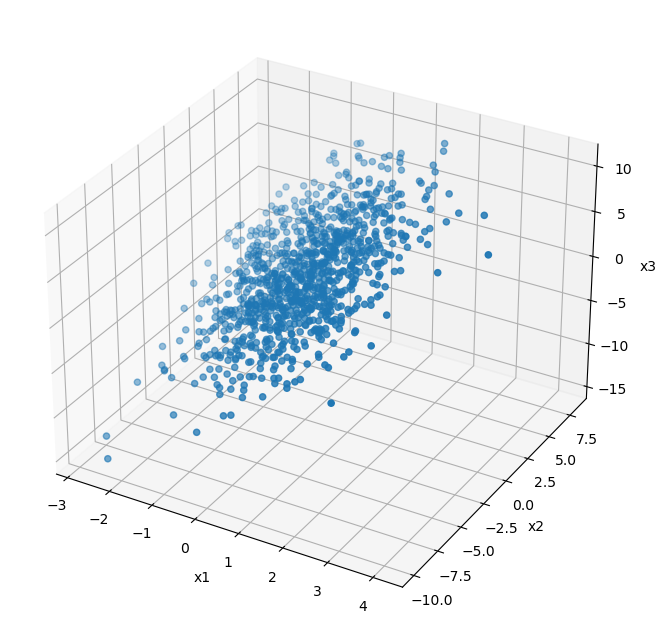

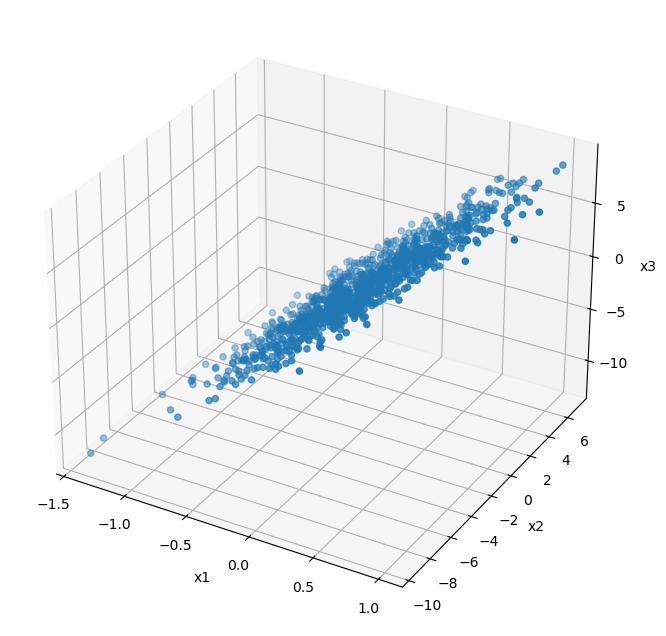

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

x = data[0]
y = data[1]
z = data[2]

ax.scatter(x, y, z)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

x = data_r[0]
y = data_r[1]
z = data_r[2]

ax.scatter(x, y, z)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")

plt.show()

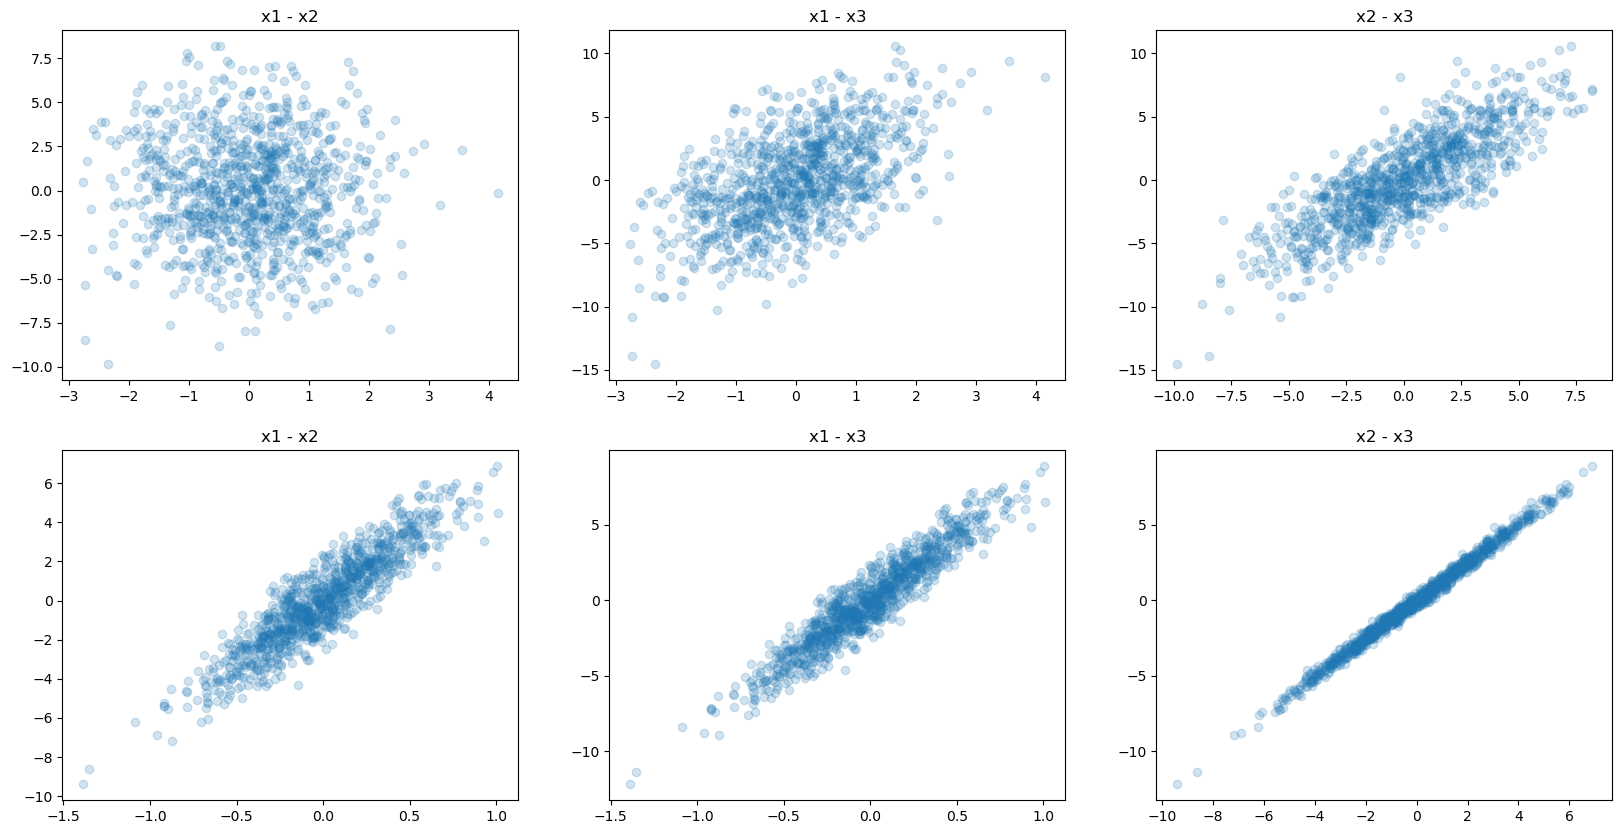

In [12]:
plt.figure(figsize=(20, 10))
plt.subplot (2, 3, 1)
plt.scatter(data[0,:], data[1,:], alpha=0.2)
plt.title('x1 - x2')
plt.subplot (2, 3, 2)
plt.scatter(data[0,:], data[2,:], alpha=0.2)
plt.title('x1 - x3')
plt.subplot (2, 3, 3)
plt.scatter(data[1,:], data[2,:], alpha=0.2)
plt.title('x2 - x3')
plt.subplot (2, 3, 4)
plt.scatter(data_r[0,:], data_r[1,:], alpha=0.2)
plt.title('x1 - x2')
plt.subplot (2, 3, 5)
plt.scatter(data_r[0,:], data_r[2,:], alpha=0.2)
plt.title('x1 - x3')
plt.subplot (2, 3, 6)
plt.scatter(data_r[1,:], data_r[2,:], alpha=0.2)
plt.title('x2 - x3')
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [13]:
noise = list(range(10))
for i in range(10):
    noise[i] = np.random.normal(loc=0, scale=1/20, size=(1000))
data_noise = np.vstack([data, noise])

In [14]:
cov = np.cov(data_noise, bias=False)
l_n, V_n = la.eig(cov)
l_n = np.real_if_close(l_n)

In [15]:
q = l_n[2] + l_n[0]
p = np.sum(l_n)
print("\nBy selecting the components 0 and 2, we retain %.2f%% of the total variability" % (q * 100 / p))


By selecting the components 0 and 2, we retain 87.31% of the total variability


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [16]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 